# Laplace Equation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

The **Laplace equation** is given by

$$
\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = 0 \ , \ \ 0 \leq x \leq 1 \ , \ \ 0 \leq y \leq 1
$$

Note that we are restricting the domain to the unit square $[0,1] \times [0,1]$.

## Boundary Conditions

Both variables $x$ and $y$ are spatial and there is no time variable $t$. Therefore there are only boundary conditions in the $x$ and $y$ directions and no initial condition to consider.

**Dirichlet boundary conditions** specify the values of the solution at the endpoints:

$$
u(x,0) = f_0(x) \ \ \ \text{and} \ \ \ u(x,1) = f_1(x)
$$

$$
u(0,y) = g_0(y) \ \ \ \text{and} \ \ \ u(1,y) = g_1(y)
$$

**Neumann boundary conditions** specify the values of the derivative of the solution at the endpoints:

$$
u_y(x,0) = p_0(x) \ \ \ \text{and} \ \ \ u_y(x,1) = p_1(x)
$$

$$
u_x(0,y) = q_0(y) \ \ \ \text{and} \ \ \ u_x(1,y) = q_1(y)
$$

When boundary conditions include both Dirichlet and Neumann conditions we call them **mixed boundary conditions**.

## Discretization

Choose the number of steps $N$ in the $x$ direction and use the same number of steps $N$ in the $y$ direction. These choices determine the step sizes $\Delta x$ and $\Delta y$, and create a grid of points:

$$
\begin{align}
x_n &= n \Delta x \ , \ \ n = 0,1, \dots, N \ , \ \ \Delta x = \frac{1}{N} \\
y_m &= m \Delta y \ , \ \ m = 0,1, \dots, N \ , \ \ \Delta y = \frac{1}{N}
\end{align}
$$

The domain of the solution $u(x,y)$ is the unit square $[0,1] \times [0,1]$. The goal of a finite difference method is to compute the matrix

$$
U = [u_{n,m}]
$$

which gives approximations of the solution $u(x,y)$ at the grid points:

$$
u_{n,m} \approx u(x_n,y_m) = u(n \Delta x,m \Delta y)
$$

where $x_0 = 0$, $x_N = 1$, $y_0 = 0$ and $y_N = 1$.

## Central Space Central Space

Apply the central difference formula to both $u_{xx}$ and $u_{yy}$ at position $x_n$ and $y_m$

$$
\frac{u(x_{n+1},y_m) - 2 u(x_n,y_m) + u(x_{n-1},y_m)}{(\Delta x)^2} + O((\Delta x)^2) \hspace{40mm}
$$

$$
+ \frac{u(x_n,y_{m+1}) - 2 u(x_n,y_m) + u(x_n,y_{m-1})}{(\Delta y)^2} + O((\Delta y)^2) = 0
$$

Rearrange using the equality $\Delta x = \Delta y$ to get the finite difference equation

$$
u_{n,m} = \frac{u_{n+1,m} + u_{n-1,m} + u_{n,m+1} + u_{n,m-1}}{4}
$$

Therefore the value at position $(x_n,y_m)$ is the average of the values in adjacent positions. This the **central-space-central-space (CSCS)** finite difference method for the Laplace equation.

## CSCS with Dirichlet BCs

### Jacobi Iteration

It is possible to setup a large system of linear equations to numerically solve the Laplace equation however a simpler method is to approximate the solution iteratively. In particular, define a sequence of matrices $U_0,U_1,U_2,\dots$ where $U_0 = [u_{n,m}^0]$ is the matrix of size $(N + 1) \times (N + 1)$ with boundary values given by the boundary conditions

$$
u^0_{n,0} = f_0(x_n) \ \ , \ \ u^0_{n,N} = f_1(x_n) \ \ , \ \ u^0_{0,m} = g_0(y_m) \ \ , \ \ u^0_{N,m} = g_1(y_m)
$$

and all other values in the interior of the matrix are 0s:

$$
u_{n,m}^0 = 0 \ \ , \ \ 0 < n < N \ \ , \ \ 0 < m < N
$$

Given the $k$th matrix $U_k = [u_{n,m}^k]$, compute the next matrix $U_{k+1} = [u_{n,m}^{k+1}]$ by again setting the boundary values 

$$
u^{k+1}_{n,0} = f_0(x_n) \ \ , \ \
u^{k+1}_{n,N} = f_1(x_n) \ \ , \ \
u^{k+1}_{0,m} = g_0(y_m) \ \ , \ \
u^{k+1}_{N,m} = g_1(y_m)
$$

and then computing the finite difference formula

$$
u^{k+1}_{n,m} = \frac{u^k_{n+1,m} + u^k_{n-1,m} + u^k_{n,m+1} + u^k_{n,m-1}}{4} \ \ , \ \ 0 < n < N \ \ , \ \ 0 < m < N
$$

Iterate until the average squared difference $\Delta U_k$ from iteration $k$ to $k+1$ is less than some set value $D$:

$$
\Delta U_k = \sqrt{\frac{1}{N^2} \sum_{n=0}^{N} \sum_{m=0}^{N} \left( u^{k+1}_{n,m} - u^k_{n,m} \right)^2 } < D
$$

### Implementation

The function `laplace` takes input parameters `f0`, `f1`, `g0`, `g1`, `N` and `D`, and returns the matrix `U` of approximations where:

* `f0` is a Python function which represents the boundary condition $u(x,0) = f_0(x)$
* `f1` is a Python function which represents the boundary condition $u(x,1) = f_1(x)$
* `g0` is a Python function which represents the boundary condition $u(0,y) = g_0(y)$
* `g1` is a Python function which represents the boundary condition $u(1,y) = g_1(y)$
* `N` is the number of steps in both $x$ and $y$ directions of the discretization
* `D` is the stopping criteria $\Delta U_k < D$
* `U` is the matrix $U = [u_{n,m}]$ of size $(N+1) \times (N+1)$ of approximations $u_{n,m} \approx u(x_n,y_m)$

Set default values `N=50`, `D=0.001` and `max_iter=1000`.

In [36]:
def laplace(f0,f1,g0,g1,N=50,D=1e-3,max_iter=1000):
    U = np.zeros([N+1,N+1])
    for n in range(N+1):
        U[n,0] = f0(n/N)
        U[n,N] = f1(n/N)
        U[0,n] = g0(n/N)
        U[N,n] = g1(n/N)
    for k in range(0,max_iter):
        Uk = U.copy()
        for n in range(1,N):
            for m in range(1,N):
                U[n,m] = (Uk[n+1,m] + Uk[n,m+1] + Uk[n-1,m] + Uk[n,m-1])/4
        dU = np.sqrt(np.sum((Uk - U)**2)/N**2)
        if dU < D:
            break
    if k == max_iter - 1:
        print("Exceeded maximum iterations.")
    else:
        print(f"Found approximation U with dUk = {dU} after k = {k} iterations.")
    return U

Note that the row index of $U$ corresponds to the variable $x$. Therefore if we want to visualize the solution with $x$ in the horizontal direction and $y$ increasing in the vertical direction then we need to plot the trranpose $U^T$ with the $y$ axis flipped. Let's write a function which does this.

In [28]:
def plot_laplace(U):
    W = np.flip(U.T,axis=0)
    plt.imshow(W,aspect='auto',cmap='RdBu_r')
    M = np.max(np.abs(U))
    plt.clim([-M,M]), plt.axis('off'), plt.colorbar()
    plt.show()

Approximate the solution for $u(x,0) = u(0,y) = u(1,y) = 0$ and $u(x,1) = 1$. Note that boundary conditions are always defined as Python functions.

Found approximation U with dUk = 0.0009989993089566857 after k=79 iterations.


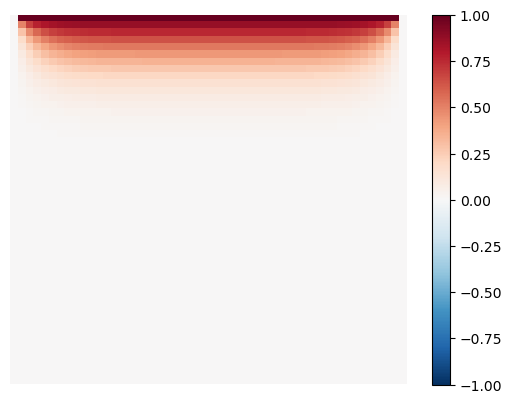

In [30]:
f0 = lambda x: 0.
f1 = lambda x: 1.
g0 = lambda y: 0.
g1 = lambda y: 0.
U = laplace(f0,f1,g0,g1)
plot_laplace(U)

### Examples

**Example 1.** Compute the solution for $u(x,0) = 2x$, $u(x,1) = x - 1$, $u(0,y) = -y$, $u(1,y) = 2(1 - y)$. Use $N=100$.

Found approximation U with dUk = 0.0009990046888100365 after k=134 iterations.


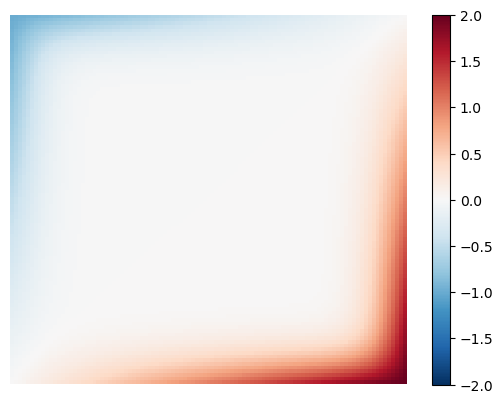

In [32]:
f0 = lambda x: 2*x
f1 = lambda x: x - 1
g0 = lambda y: -y
g1 = lambda y: 2*(1 - y)
U = laplace(f0,f1,g0,g1,N=100)
plot_laplace(U)

**Example 2.** Compute the solution for $u(x,0) = x^2 - 1$, $u(x,1) = x^2$, $u(0,y) = y^2 - 1$, $u(1,y) = y^2$. Use $N=50$ and $D = 0.0001$.

Found approximation U with dUk = 9.989795002416083e-05 after k=672 iterations.


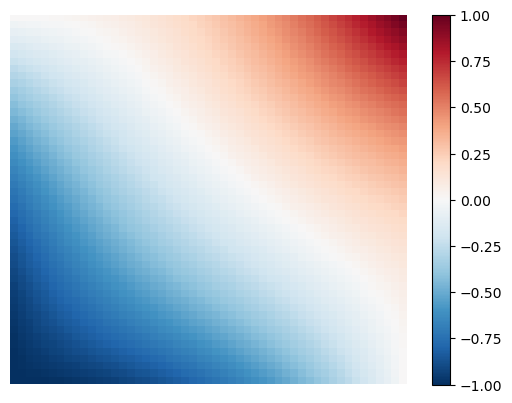

In [35]:
f0 = lambda x: x**2 - 1
f1 = lambda x: x**2
g0 = lambda y: y**2 - 1
g1 = lambda y: y**2
U = laplace(f0,f1,g0,g1,N=50,D=1e-4)
plot_laplace(U)

**Example 3.** Compute the solution for boundary conditions:

$$
\begin{align*}
u(x,0) &= -1 - \cos(\pi x) \\
u(x,1) &= 1 - \cos(\pi x) \\
u(0,y) &= -1 - \cos(\pi y) \\
u(1,y) &= 1 - \cos(\pi y)
\end{align*}
$$

Use $N=50$ and $D = 0.0001$.

Found approximation U with dUk = 9.995457095552456e-05 after k = 689 iterations.


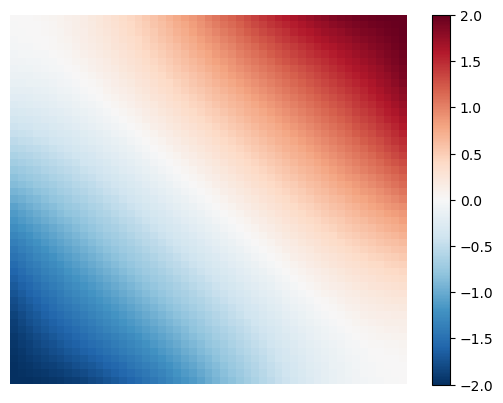

In [39]:
f0 = lambda x: -1 - np.cos(np.pi*x)
f1 = lambda x: 1 - np.cos(np.pi*x)
g0 = lambda y: -1 - np.cos(np.pi*y)
g1 = lambda y: 1 - np.cos(np.pi*y)
U = laplace(f0,f1,g0,g1,N=50,D=1e-4)
plot_laplace(U)

## CSCS with Neumann BCs

*Under construction*

## CSCS with Mixed BCs

*Under construction*